<h1>LLE（locally linear embedding : 局所線形埋め込み法）</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html#sklearn.manifold.locally_linear_embedding

LLEは、射影に依存しない多様体テクニックであり、特にのノイズがあまり多くない時には、曲がりくねった多様体の展開で力を発揮する<br>
sklearnの<b>LoacallyLinearEmbedding</b>クラスを使用する。LLEは大規模なデータセットへのスケーラビリティは低い

<h4>LLEの仕組み</h4>
まず、アルゴリズムは、個々の訓練インスタンス$x^{(i)}$について、最近傍のk個のインスタンスを見つけ、それらの最近傍インスタンスの線形関数として$x^{(i)}$を再構築しようとする。具体的には、$x^{(j)}$が$x^{(i)}$のk個の最近傍インスタンスのひとつではないものとして、$x^{(i)}$と$\sum_{j=1}^{m}w_{i,j}x^{(j)}$の二乗距離ができる限り小さくなるような重み$w_{i,j}$を見つけることだ。式で表すと、次のような制約付き最適化問題となる

$\hat{W}=argmin_W \sum_{i=1}^{m}(x^{(i)} - \sum_{j=1}^{m}w_{i,j}x^{(j)})^2$<br>
$「\sum_{j=1}^{m}w_{i,j}=1 (i=1,2,...,m)」かつ「w_{i,j}はx^{(j)}がx^{(i)}のk個の最近傍でないなら0」$<br>
重み行列$\hat{W}$は重み$\hat{w}_{i,j}$を格納し、m*mの行列

第二ステップでは、この局所的な関係を最大限維持しながら訓練インスタンスをd次元（d<n）にマッピングする。具体的には、次のような最適化問題となる。これはインスタンスを固定して最適な重みを見つけるのではなく、逆に重みを固定して低次元空間でのインスタンスのイメージの最適な位置$z^{(i)}$を見つけている。なお、$Z$はすべての$z^{i}$を格納する行列である。$x$は$n$次元ベクトルで、$z$は$d$次元ベクトルである

$\hat{Z}=argmin_Z \sum_{i=1}^{m}(z^{(i)} - \sum_{j=1}^{m}w_{i,j}z^{(j)})^2$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

In [3]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

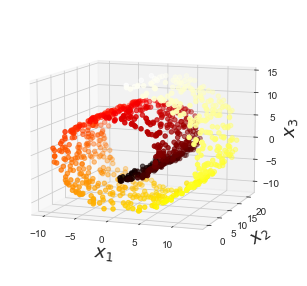

In [4]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

In [5]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

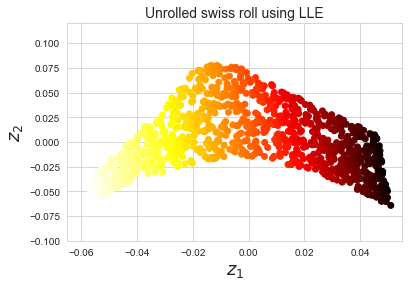

In [6]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

<h1>t-distributed Stochastic Neighbor Embedding (t-SNE)</h1>

In [7]:
# t-Distributed Stochastic Neighbor Embedding
# データを変換して散布図で可視化したいときによく用いられる、多様体アルゴリズムと呼ばれる一連のアルゴリズムがある
# 特に有用なのがt-SNEアルゴリズムである
# 多様体学習アルゴリズムは主に可視化に用いられ、ほとんどの場合、3以上の新しい特徴量を生成するように利用することはない
# さらに多様体学習アルゴリズムの一部（t-SNEを含む）は、訓練データの新たな表現を計算するが、新しいデータを変換することはできない
# 従って、最終的な目的が教師あり学習の場合にはほとんど用いられない
# t-SNEは、データポイントの距離を可能な限り維持する2次元表現を見つけようとする
# t-SNEは新しいデータの変換をサポートしていないので、TSNEクラスにはtransformメソッドがない。代わりに、fit_transformメソッドを利用する

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

(1797, 8, 8)
(1797, 64)


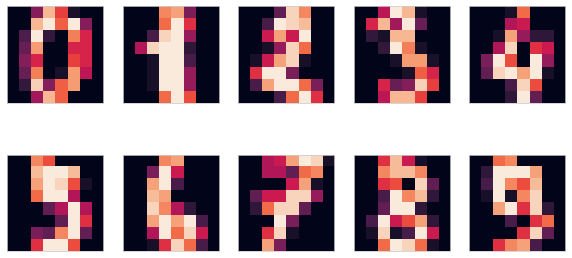

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.images.shape)
print(digits.data.shape)

fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw = {"xticks":(),"yticks":()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

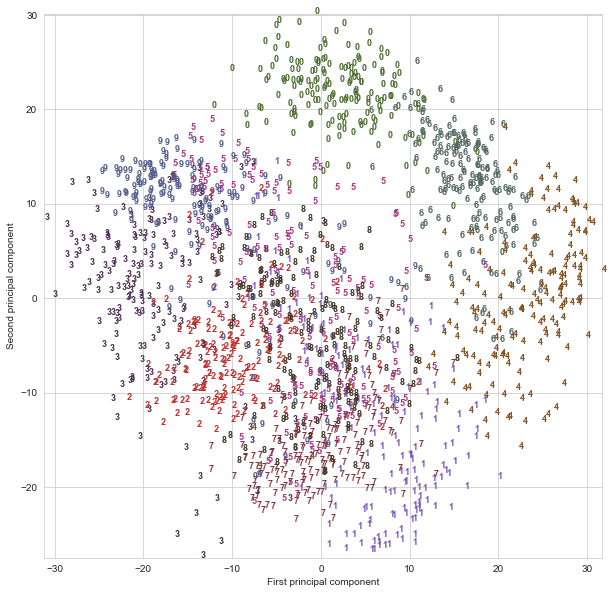

In [10]:
# PCAで最初の2つの主成分の2次元にして可視化すると、多くの数字が大きく重なり合っている
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]
plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict = {"weight":"bold","size":9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

(1797, 2)


Text(0, 0.5, 't-SNE feature 1')

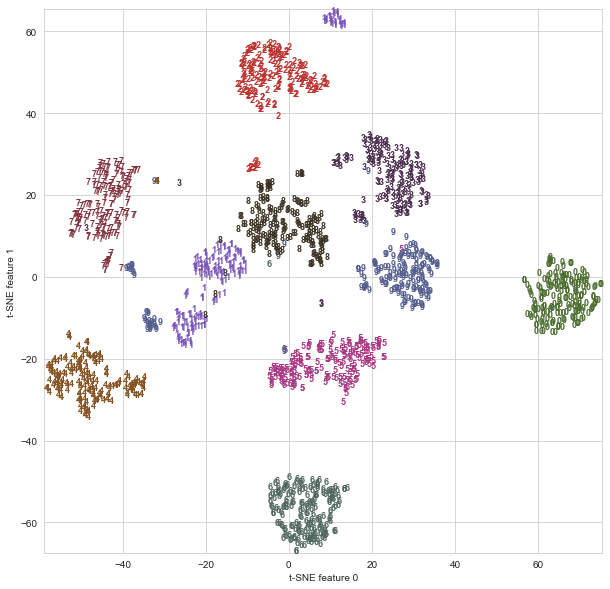

In [11]:
# t-SNEでは、PCAと異なり、すべてのクラスがかなり明確に分類されている
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)
digits_tsne = tsne.fit_transform(digits.data)
print(digits_tsne.shape)

plt.figure(figsize = (10 ,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),color = colors[digits.target[i]], fontdict = {"weight":"bold","size":9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")